# Classification with logistic regression and machine learning  
In this section, we will explore classification problems with logistic regression and machine learning. We will use one of sklearns example data sets for this, which is a copy of UCI ML Breast Cancer Wisconsin (Diagnostic) datasets. The data contains information on medical testing for breast cancer, where the task is to predict if a tumor is malignant (bad) or benign (not so bad). This can be done with features obtained from images taken from the tumor:

- radius (mean of distances from center to points on the perimeter)
- texture (standard deviation of gray-scale values)
- perimeter
- area
- smoothness (local variation in radius lengths)
- compactness (perimeter^2 / area - 1.0)
- concavity (severity of concave portions of the contour)
- concave points (number of concave portions of the contour)
- symmetry
- fractal dimension (“coastline approximation” - 1)

The mean, standard error, and “worst” or largest (mean of the three worst/largest values) of these features were computed for each image, resulting in 30 features.

In [1]:
from sklearn.datasets import load_breast_cancer
import numpy as np
import matplotlib.pyplot as plt

data = load_breast_cancer(as_frame=True) # let us first load the data
X = data.data # These are the predictive features
y = data.target # This is the target information (malignant: 0, or benign: 1)
X.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [2]:
# first we split up the data in training and test as usual 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# we define the classifier to be a logistic regression 
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state = 0)
clf.fit(X_train, y_train) # ... and fit the model on the training data
y_pred = clf.predict(X_test) # we can make predictions on the test data

# To analyse the performance we can use a confusion matrix (see lecture slides)
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
CM = confusion_matrix(y_test, y_pred)
print(CM) 

[[45  2]
 [ 4 63]]


/home/hendrik/anaconda3/envs/ss22/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


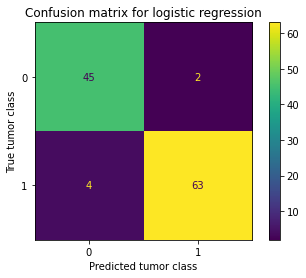

In [3]:
# we can also plot the confusion matrix using the function ConfusionMatrixDisplay 
disp = ConfusionMatrixDisplay(CM)
disp.plot()
plt.xlabel("Predicted tumor class")
plt.ylabel("True tumor class")
plt.title("Confusion matrix for logistic regression")
plt.show()

In [4]:
# From the confusion matrix, we can directly extract the information on the classification results and compute performance metrics of the classifier 

TN = CM[0][0] # True negative
FN = CM[1][0] # False negative
TP = CM[1][1] # True positive
FP = CM[0][1] # False positive

## We discussed these metrics of the confusion matrix in the lecture
# Probability of detection, also: sensitivity, hit rate, recall, or true positive rate
POD = TP/(TP+FN)
# Overall accuracy, also percent correct (multiply by 100 to convert to %)
ACC = (TP+TN)/(TP+FP+FN+TN)
# False alarm rate
FAR = FP/(TP+FP)
# Bias score
BS = (TP+FP)/(TP+FN)

## some additional metrics
# Specificity or true negative rate
TNR = TN/(TN+FP) 
# Precision or positive predictive value
PPV = TP/(TP+FP)
# Negative predictive value
NPV = TN/(TN+FN)
# Fall out or false positive rate
FPR = FP/(FP+TN)
# False negative rate
FNR = FN/(TP+FN)

print("Probability of detection: ", round(POD,3))
print("Overall accuracy: ", round(ACC,3))
print("False alarm rate: ", round(FAR,3))
print("Bias score: ", round(BS,3))

Probability of detection:  0.94
Overall accuracy:  0.947
False alarm rate:  0.031
Bias score:  0.97


## Comment logistic regression results, following machine learning approach 
We can see that the logistic regression already performs really well, as ~95% of the classification results are correct (overall accuracy of 0.947). Can we do even better than that with a machine learning method (here: gradient boosting classifier)?   

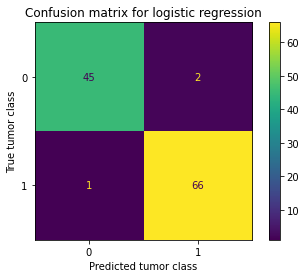

In [5]:
from sklearn.ensemble import GradientBoostingClassifier
clf = GradientBoostingClassifier(n_estimators=200, learning_rate=1.0, max_depth=3, random_state=0).fit(X_train, y_train) # define and fit the model
y_pred = clf.predict(X_test) # make predictions
CM = confusion_matrix(y_test, y_pred) # calculate confusion matrix

disp = ConfusionMatrixDisplay(CM) #...and plot it
disp.plot()
plt.xlabel("Predicted tumor class")
plt.ylabel("True tumor class")
plt.title("Confusion matrix for logistic regression")
plt.show()

In [6]:
# again we compute perfomance metrics on the gradient boosting classifier

TN = CM[0][0]
FN = CM[1][0]
TP = CM[1][1]
FP = CM[0][1]

## We discussed these metrics of the confusion matrix in the lecture
# Probability of detection, also: sensitivity, hit rate, recall, or true positive rate
POD = TP/(TP+FN)
# Overall accuracy, also percent correct (multiply by 100 to convert to %)
ACC = (TP+TN)/(TP+FP+FN+TN)
# False alarm rate
FAR = FP/(TP+FP)
# Bias score
BS = (TP+FP)/(TP+FN)

## some additional metrics
# Specificity or true negative rate
TNR = TN/(TN+FP) 
# Precision or positive predictive value
PPV = TP/(TP+FP)
# Negative predictive value
NPV = TN/(TN+FN)
# Fall out or false positive rate
FPR = FP/(FP+TN)
# False negative rate
FNR = FN/(TP+FN)

print("Probability of detection: ", round(POD,3))
print("Overall accuracy: ", round(ACC,3))
print("False alarm rate: ", round(FAR,3))
print("Bias score: ", round(BS,3))

Probability of detection:  0.985
Overall accuracy:  0.974
False alarm rate:  0.029
Bias score:  1.015


## Comment gradient boosting classifier, following sensitivity analysis
The application of a gradient boosting classifier shows that even without hyperparameter tuning, the already good results of the logistic regression can be improved upon (~97% correct classifications). We can now use shap values as shown before to analyse how the model makes the decision if a tumor is malignant or benign.

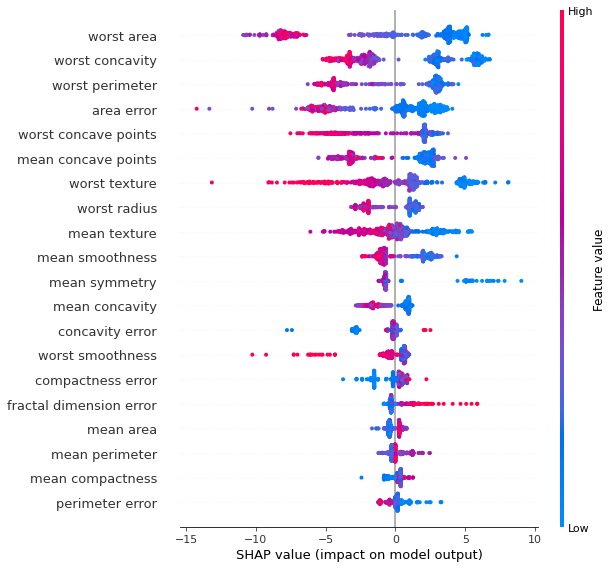

In [18]:
import shap
explainer = shap.TreeExplainer(clf) 
shap_values = explainer.shap_values(X) 
shap.summary_plot(shap_values,X) 

We can see that - for example - if the 
- worst area
- worst concavity
- worst parameter

are small, the SHAP values are positive (-> they contribute to the model predicting 1 (benign - not so bad)), however, if they are large, the SHAP values are negative (-> they contribute to the model predicting 0 (malignant - bad))

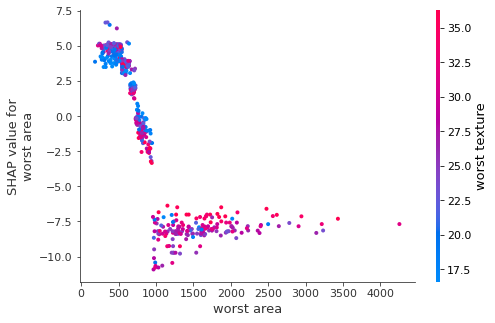

In [19]:
shap.dependence_plot("worst area", shap_values, X)

The most important model feature is "worst area", and it is highly nonlinearly related to the prediction. Increases of worst area at low values (~<1000) have a large influence on the model predicted class (malignant/benign). Once worst area reaches a size of ~1000, this feature always contributes similarly strongly to the model predicting "malignant". If the worst area is smaller than ~500, this feature contributes to the model predicting benign. Overall, the influence of worst area is not strongly dependent on other features (e.g. worst texture as shown here).